In [9]:
import sys
import matplotlib.pyplot as plt

In [15]:
sys.path.append("../helpers")
from audio_process import AudioProcess
from ProjectData import ProjectData
import json

# Create ProjectData object

In [3]:
projectData = ProjectData()

# Get auido paths 

In [4]:
audioPaths = projectData.get_audio_paths()

# Loop thought audio files, create melSpectrograms and save the data

In [6]:
for key in audioPaths.keys():
    for path in audioPaths[key]:
        audio = AudioProcess(
            audio_path=path,
            class_name=key
        )
        audio.create_data(["melSpectrogram"])
        audio.save_data()

# Show example spectrograms

In [53]:
example_data = projectData.get_data_paths(indexes=range(0, 1000, 100))

In [54]:
specs = {}
for item in example_data["melSpectrogram"]:
    key,path = list(item.items())[0]
    spectrogram = json.load(open(path))
    specs[key] = spectrogram

In [44]:
map_labels = { i:key for i, key in enumerate(audioPaths.keys())}

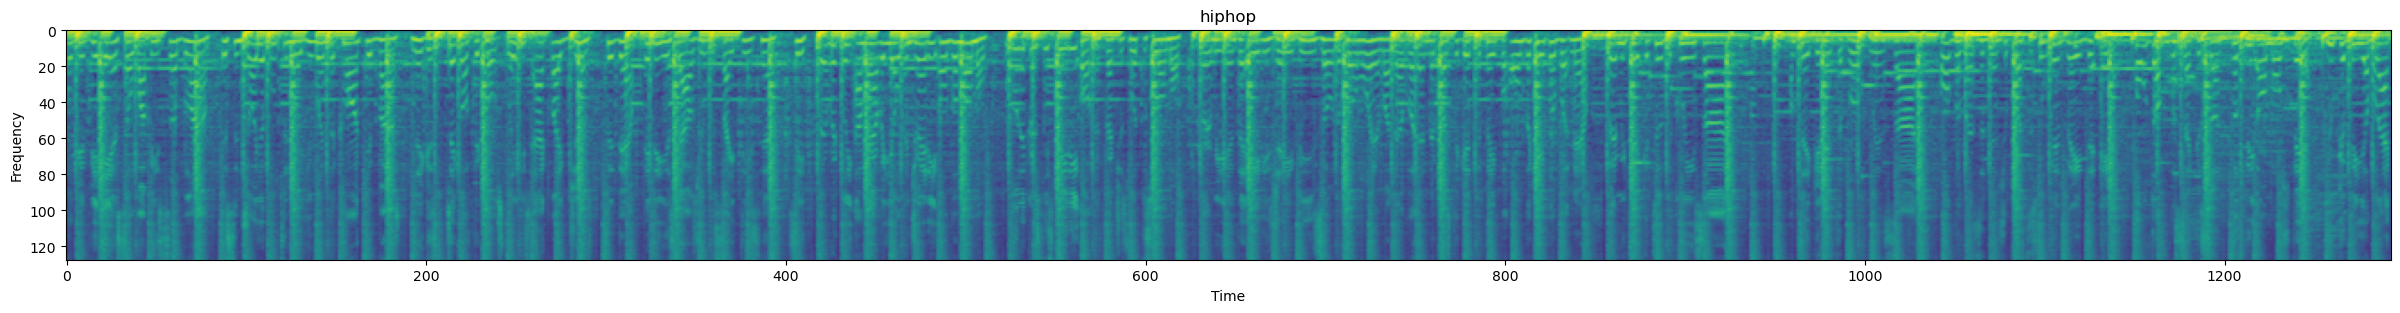

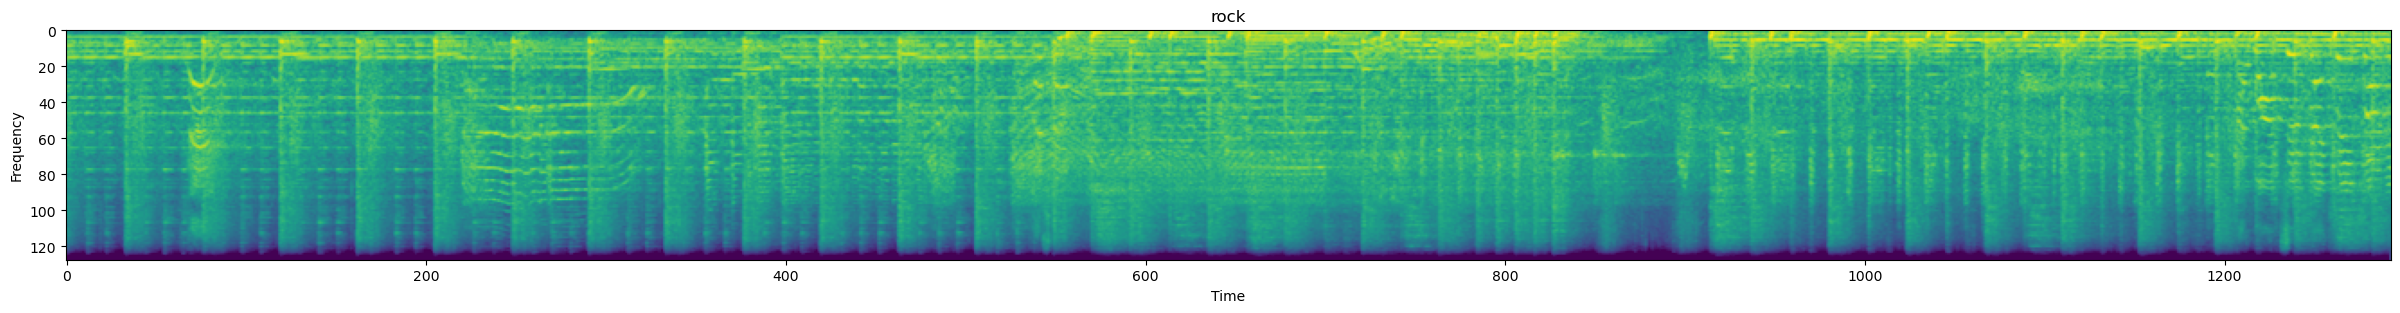

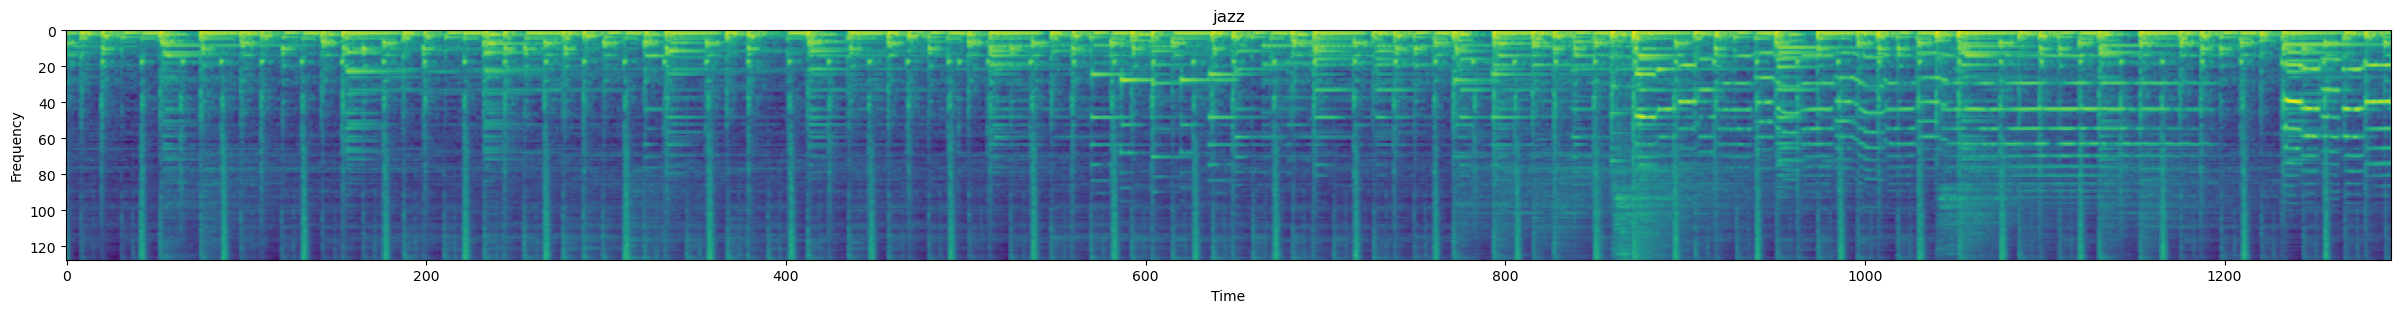

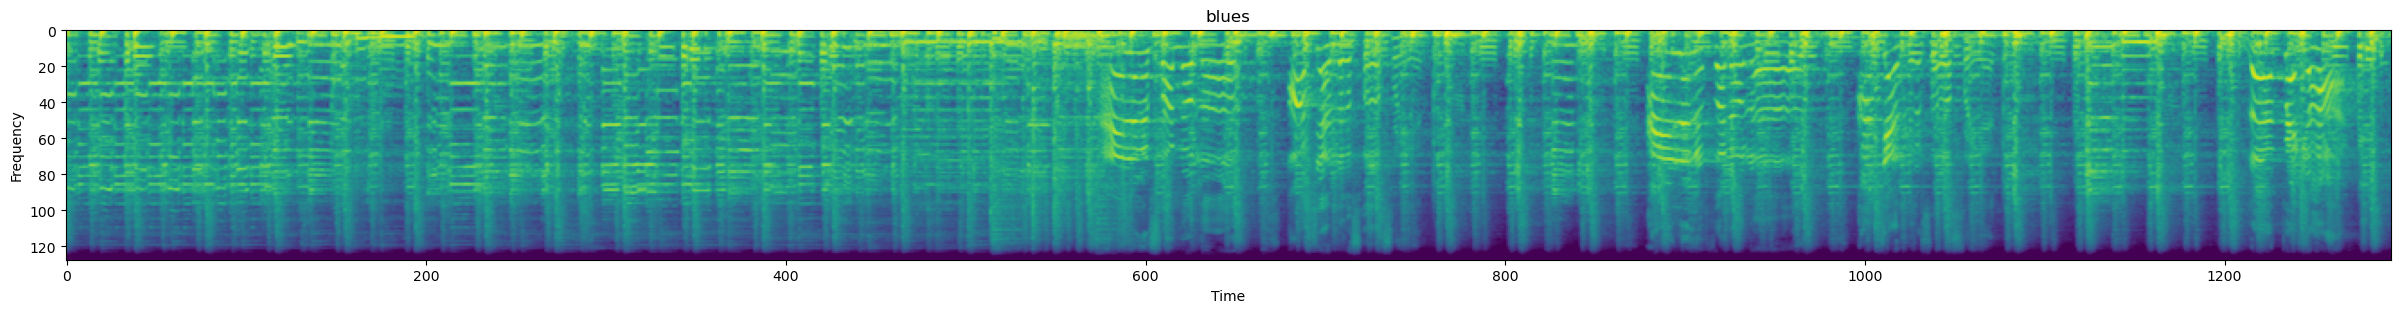

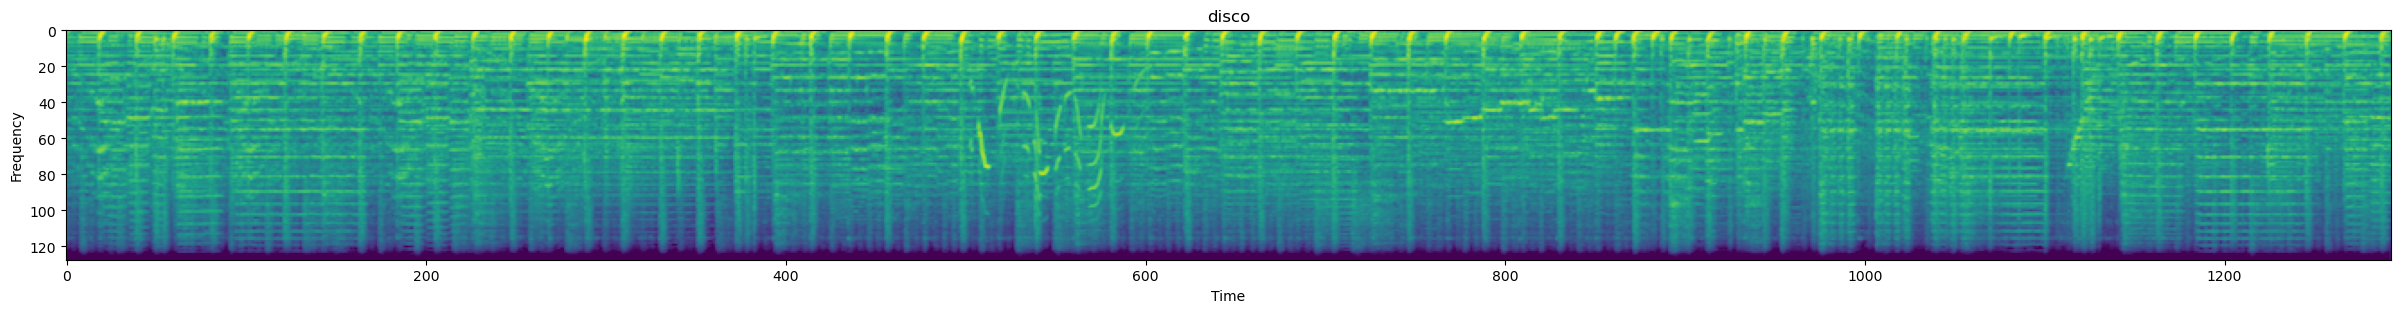

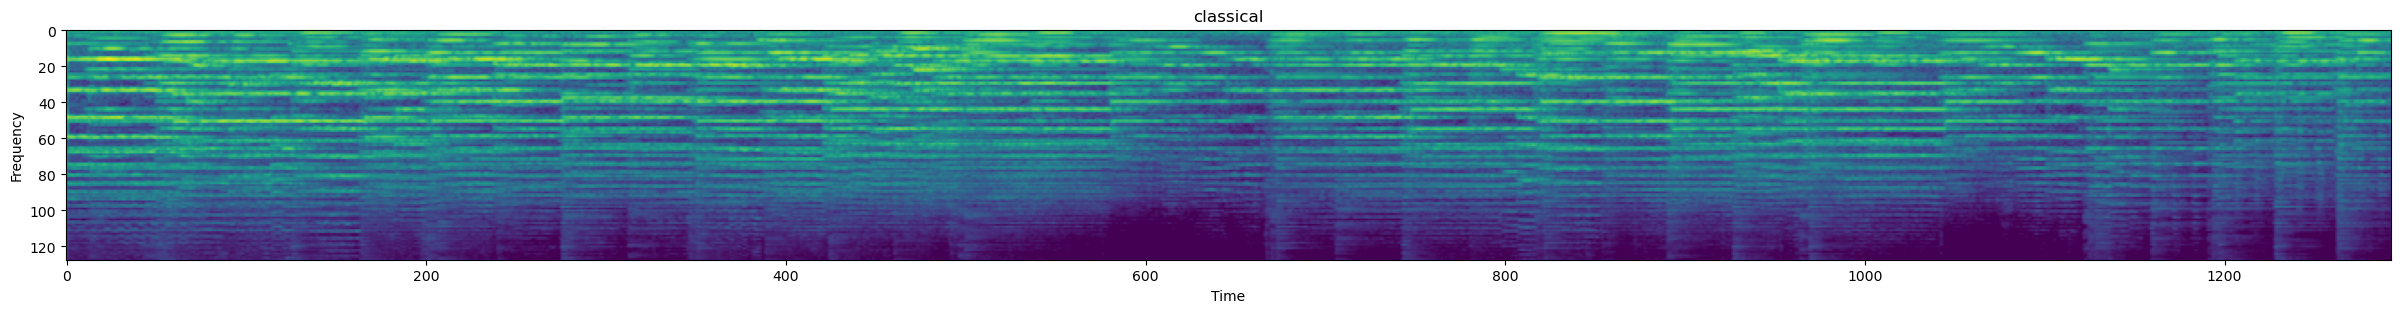

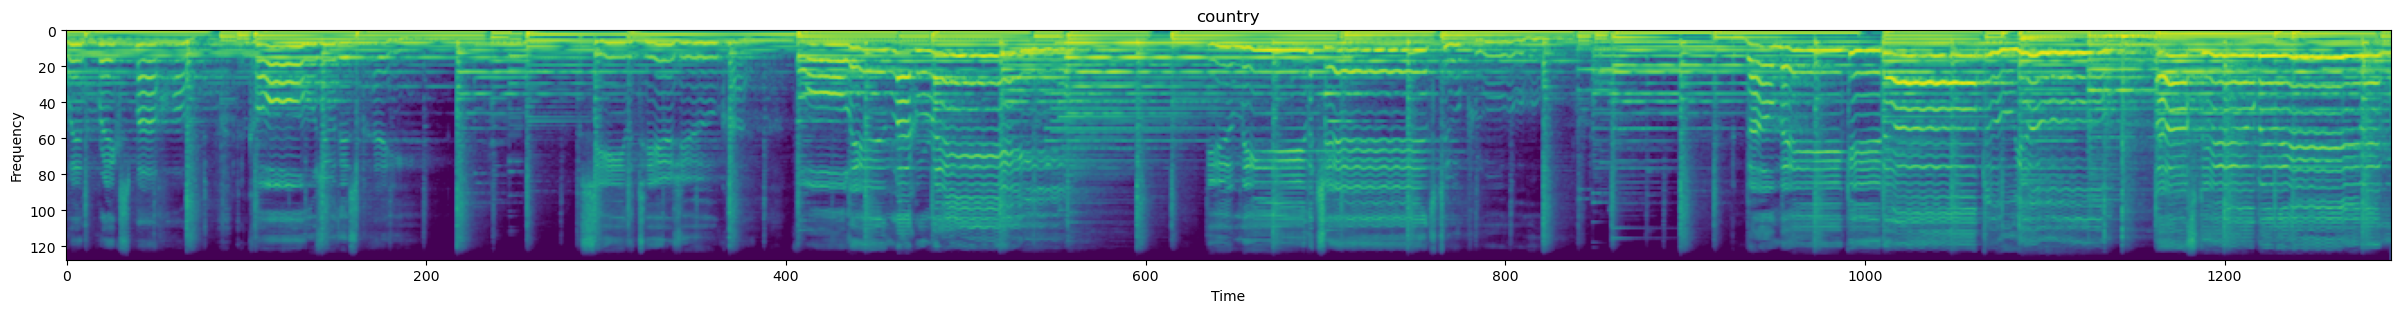

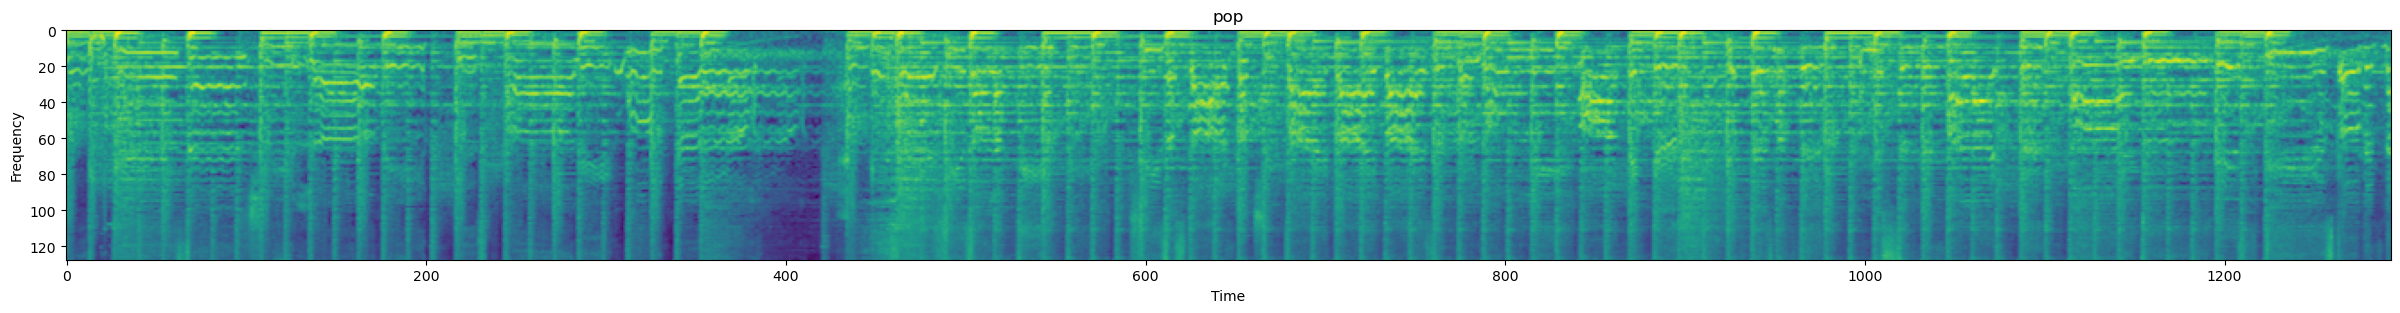

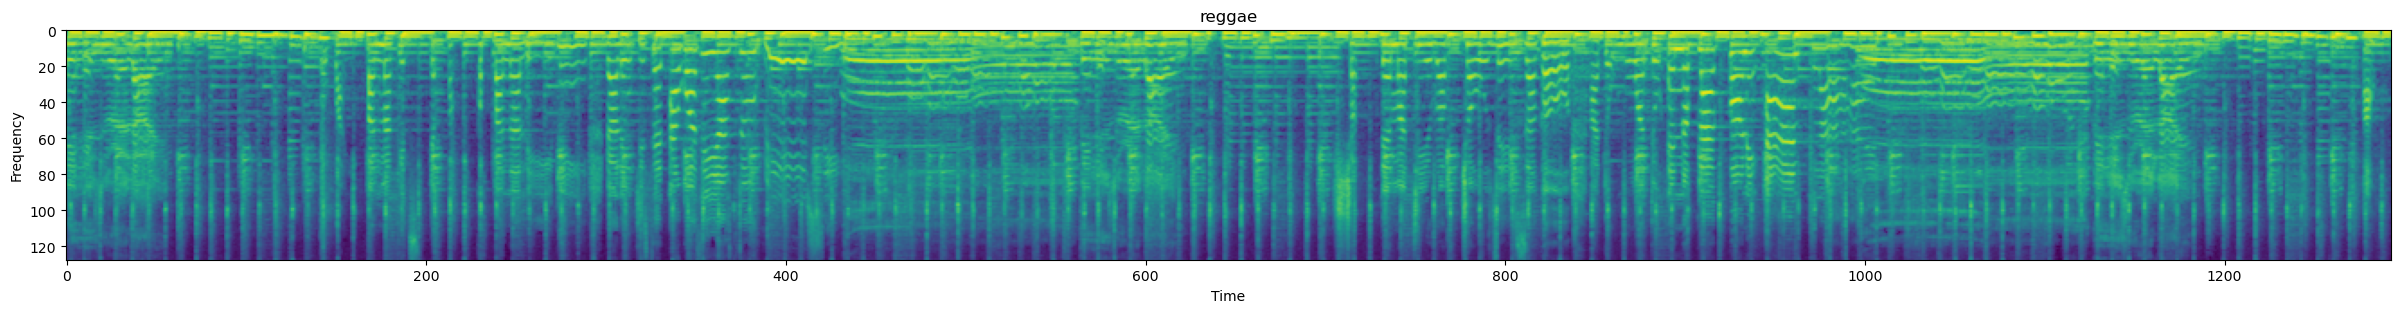

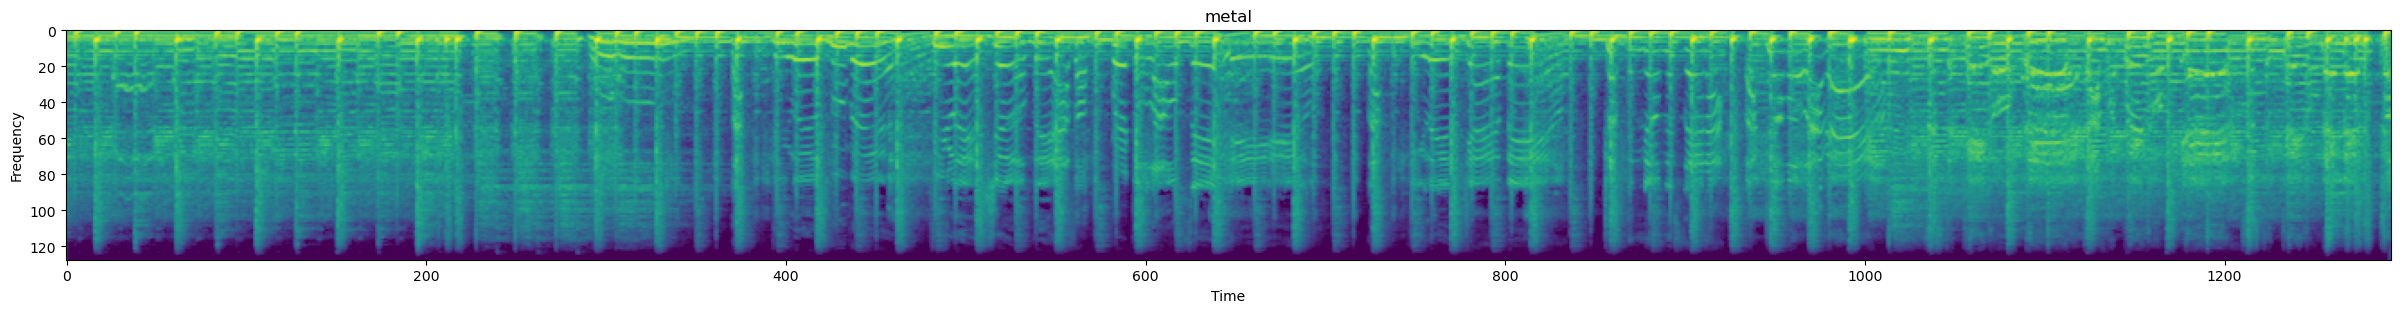

In [55]:
for key in specs.keys():
    plt.figure(figsize=(30, 4))
    plt.title(map_labels[key])
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.imshow(specs[key]["melSpectrogram"])